# lib6
Functions for exercise 6.

In [6]:
import pandas as pd

data = [
    [20221305, "Alwali Walyatalattov Solichin"],
    [20222001, "Syifa Hilya Tsaniya"],
    [20222003, "Raihan Mohammad Rahman"],
    [20222009,	"Muhammad Risyad Naufal"],
    [20222011, "Deni Ramdani"],
    [20222013, "Andi M. N. F. Syamsul"],
    [20222014, "Nur Annisa"],
    [20222017, "Beny Agustirandi"],    
]

df = pd.DataFrame(data, columns=['SID', 'Studenoid'])

In [ ]:
import numpy as np

def sine_wave(freq, sample_rate, duration):
    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    omega = 2 * np.pi * freq
    y = np.sin(omega * t)
    return t, y

def cosine_wave(freq, sample_rate, duration):
    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    omega = 2 * np.pi * freq
    y = np.cos(omega * t)
    return t, y

In [ ]:
from scipy.io.wavfile import write

sample_rate = 44100 # Hz
int16max = 32767 # 16-bit int -32768 -- 32767
duration = 4 # s

flow = [100, 200]    # Hz
fmed = [500, 600]   # Hz
fhig = [1000, 2000] # Hz

for i in range(len(flow)):
    for j in range(len(fmed)):
        for k in range(len(fhig)):
            bnum = f"{i}{j}{k}"
            dnum = int(bnum, 2)
            sid = data[dnum][0]
            fn = f"{sid}.wav"
            _, low = sine_wave(flow[i], sample_rate, duration)
            _, med = sine_wave(fmed[j], sample_rate, duration)
            _, hig = sine_wave(fhig[k], sample_rate, duration)
            y = low + med + hig
            yn = np.int16((y / y.max()) * int16max)
            write(fn, sample_rate, yn)

In [1]:
def sinusoidal_grating(sample, wavelength, angle):
    xmin = 0
    xmax = sample
    x = np.arange(xmin, xmax, 1)
    X, Y = np.meshgrid(x, x)
    Z = X * np.cos(angle) + Y * np.sin(angle)
    grating = np.sin(2 * np.pi * Z / wavelength)
    return grating

def create_png_image_sinusoidal_grating(Image, sample, wavelength, angle):
    sg = sinusoidal_grating(sample, wavelength, angle)
    sg_min = min(map(min, sg))
    sg_max = max(map(max, sg))
    
    im = Image.new('L', (sample, sample))
    pix = im.load()
    for y in range(sample):
        for x in range(sample):
            c = int(255 * (1 + sg[y][x]))
            #c = int(255 * sg[y][x])
            #c = int(255 * (sg[y][x] - sg_min) / (sg_max - sg_min))
            #c = sg[y][x]
            #c = int( (sg[y][x] - sg_min) / (sg_max - sg_min) * 255)
            #print(type(c))
            #print(sg[y][x], c)
            #print(c)
            #yn = np.int16((y / y.max()) * int16max)
            pix[x, y] = c
    return im

int8max = 127 # -128 -- 126

In [10]:
import numpy as np
import matplotlib.pyplot as plt


lx1 = [10, 20, 50]
lx2 = [20, 25, 25]
ly1 = [50, 50, 10]
ly2 = [10, 20, 50]

N = 8
k = 0
for i in range(3):
    for j in range(3):
            sid = data[k][0]
            fn = f"{sid}.png"
            imx1 = sinusoidal_grating(100, lx1[i], 0.0 * np.pi)
            imx2 = sinusoidal_grating(100, lx2[i], 0.0 * np.pi)
            imy1 = sinusoidal_grating(100, ly1[j], 0.5 * np.pi)
            imy2 = sinusoidal_grating(100, ly2[j], 0.5 * np.pi)
            im = imx1 + imx2 + imy1 + imy2
            plt.imsave(fn, im, cmap='gray', format='PNG')
            k += 1
            if k >= 8:
                break


127.3933


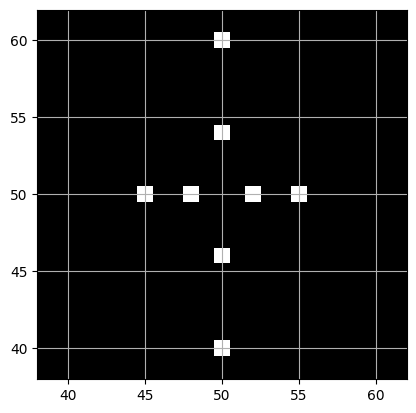

In [5]:
from PIL import Image

im = Image.open('temp.png').convert('L')
im = np.array(im)
mean = np.mean(im)
print(mean)
im = im - mean

ft = np.fft.ifftshift(im)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
ft = np.abs(ft)

ftmin = ft.min()
ftmax = ft.max()

plt.imsave("temp2.png", ft, cmap='gray', format='PNG')
plt.xlim([38, 62])
plt.ylim([38, 62])
plt.grid()
plt.imshow(ft, cmap='gray')
plt.show()